In [1]:
import pickle
import timeit
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
with open('test_data.pkl', 'rb') as f:
    [test_data_avg, test_data_best, test_data_worst] = pickle.load(f)

In [3]:
df_merge = pd.DataFrame(index=test_data_avg.index,
                            columns=['worst case', 'average case', 'best case'])

In [4]:
def merge(A, p, q, r):
    n1 = q - p
    n2 = r - q
    L = [0] * (n1)
    R = [0] * (n2)
    for i in range(n1):
        L[i] = A[p + i]
    for j in range(n2):
        R[j] = A[q + j]

    i, j, k = 0, 0, 0

    while i < n1 and j < n2 :
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1
        k += 1

    while i < n1:
        A[k] = L[i]
        i += 1
        k += 1

    while j < n2:
        A[k] = R[j]
        j += 1
        k += 1

In [5]:
def merge_sort(A):
    if len(A) > 1:
        p = 0
        r = len(A)
        q = r // 2
        merge_sort(A[:q])
        merge_sort(A[q:])
        merge(A, p, q, r)

In [6]:
def time_sort(sort_func, data, repeat=1):
    clock = timeit.Timer(stmt='sort_func(copy(data))',
                     globals={'sort_func': sort_func,
                                'data': data ,
                                'copy': copy.copy})
    n_ar, t_ar = clock.autorange()
    t = np.mean(clock.repeat(repeat=repeat, number=n_ar)) / n_ar
    return t

In [7]:
for index in test_data_avg.index[:15]:
    df_merge.loc[index,:] =  [time_sort(merge_sort, test_data_worst[index], 3),
                                  time_sort(merge_sort, test_data_avg[index], 3),
                                  time_sort(merge_sort, test_data_best[index], 3),]
    print(f'{index} finished')

test_data_2^0 finished
test_data_2^1 finished
test_data_2^2 finished
test_data_2^3 finished
test_data_2^4 finished
test_data_2^5 finished
test_data_2^6 finished
test_data_2^7 finished
test_data_2^8 finished
test_data_2^9 finished
test_data_2^10 finished
test_data_2^11 finished
test_data_2^12 finished
test_data_2^13 finished
test_data_2^14 finished


In [16]:
with open('df_merge.pkl', 'wb') as f:
    pickle.dump([df_merge], f)

In [8]:
xtick_label = [2**n for n in range(15)]

In [9]:
xtick_label

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]

In [10]:
df_merge

,worst case,average case,best case
test_data_2^0,0.000001,0.000001,0.000001
test_data_2^1,0.000006,0.000005,0.000005
test_data_2^2,0.000013,0.000014,0.000013
test_data_2^3,0.000031,0.000034,0.000034
test_data_2^4,0.000046,0.000047,0.000046
test_data_2^5,0.000106,0.000102,0.000096
test_data_2^6,0.000208,0.000227,0.000208
test_data_2^7,0.000457,0.000484,0.000461
test_data_2^8,0.000999,0.001048,0.000996
test_data_2^9,0.002187,0.002278,0.002067


In [35]:
xtick_label = [2**n for n in range(17)]
ytick_label = [10**n for n in range(-6, 0)]
# calculate scaled nlgn curve to compare
def func_nlgn(n):
    return n*np.log2(n)
y_nlgn =  func_nlgn(xtick_label)[:15] * df_merge['worst case'].max() \
            / func_nlgn(xtick_label[14])

C:\Users\uranu\AppData\Local\Temp\ipykernel_18392\67554905.py:12: UserWarning: Attempted to set non-positive top ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(10**-6.2, 0)


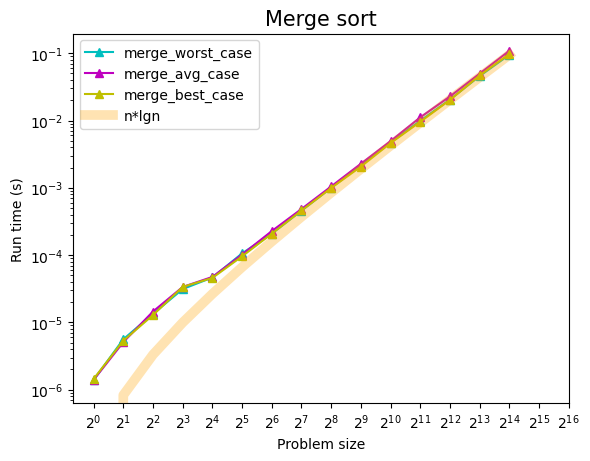

In [36]:
fig, ax = plt.subplots()
ax.plot(xtick_label, df_merge['worst case'],'c^-', label='merge_worst_case')
ax.plot(xtick_label, df_merge['average case'],'m^-', label='merge_avg_case')
ax.plot(xtick_label, df_merge['best case'],'y^-', label='merge_best_case')
# plot scaled nlgn curve
ax.plot(np.array(xtick_label)[:15], y_nlgn, label='n*lgn',
        linewidth=7, alpha=0.3, color='orange')
ax.set_xscale('log', base=2)
ax.set_yscale('log', base=10)
ax.set_xticks(xtick_label)
ax.set_yticks(ytick_label)
ax.set_ylim(10**-6.2, 0)
ax.set_xlabel('Problem size')
ax.set_ylabel('Run time (s)')
ax.set_title('Merge sort', fontsize=15)
ax.legend()

In [12]:
with open('df_insertion.pkl', 'rb') as f:
    [df_insertion] = pickle.load(f)

In [13]:
df_insertion

,worst case,average case,best case
test_data_2^0,0.000001,0.000001,0.000001
test_data_2^1,0.000002,0.000001,0.000001
test_data_2^2,0.000003,0.000003,0.000002
test_data_2^3,0.00001,0.000007,0.000003
test_data_2^4,0.000035,0.000026,0.000005
test_data_2^5,0.000137,0.000077,0.00001
test_data_2^6,0.000533,0.000262,0.000018
test_data_2^7,0.002238,0.000974,0.000037
test_data_2^8,0.008972,0.004391,0.000076
test_data_2^9,0.038062,0.023019,0.000168


In [37]:
xtick_label = [2**n for n in range(17)]
ytick_label = [10**n for n in range(-6, 3)]
# calculate scaled n^2 curve to compare
y_square =  np.square(xtick_label)[:15] * df_insertion['worst case'].max() \
            / np.square(xtick_label[14])
# calculate scaled nlgn curve to compare
def func_nlgn(n):
    return n*np.log2(n)
y_nlgn =  func_nlgn(xtick_label)[:15] * df_merge['worst case'].max() \
            / func_nlgn(xtick_label[14])
# calculate scaled n curve to compare
y_n =  np.array(xtick_label[:15]) * df_insertion['best case'].max() \
            / xtick_label[14]

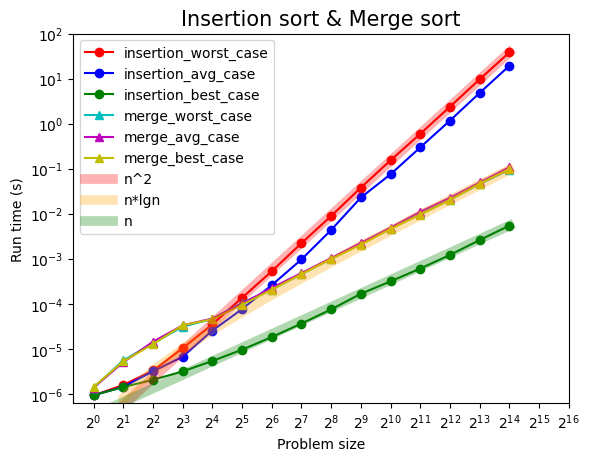

In [38]:
fig, ax = plt.subplots()
ax.plot(xtick_label, df_insertion['worst case'],'ro-', label='insertion_worst_case')
ax.plot(xtick_label, df_insertion['average case'],'bo-', label='insertion_avg_case')
ax.plot(xtick_label, df_insertion['best case'],'go-', label='insertion_best_case')
ax.plot(xtick_label, df_merge['worst case'],'c^-', label='merge_worst_case')
ax.plot(xtick_label, df_merge['average case'],'m^-', label='merge_avg_case')
ax.plot(xtick_label, df_merge['best case'],'y^-', label='merge_best_case')
# plot scaled n^2 curve
ax.plot(np.array(xtick_label)[:15], y_square, label='n^2',
        linewidth=7, alpha=0.3, color='r')
# plot scaled nlgn curve
ax.plot(np.array(xtick_label)[:15], y_nlgn, label='n*lgn',
        linewidth=7, alpha=0.3, color='orange')
ax.plot(np.array(xtick_label)[:15], y_n, label='n',
        linewidth=7, alpha=0.3, color='g')
ax.set_xscale('log', base=2)
ax.set_yscale('log', base=10)
ax.set_xticks(xtick_label)
ax.set_yticks(ytick_label)
ax.set_ylim(10**-6.2, 10**2)
ax.set_xlabel('Problem size')
ax.set_ylabel('Run time (s)')
ax.set_title('Insertion sort & Merge sort', fontsize=15)
ax.legend()